In [1]:
import pandas as pd
def file2matrix(filename):
    """
    parameters:
        filename
    return：
        dataset, labels
    """
    # provided sample is tab separated and no columns name
    dataset = pd.read_csv(filename, sep='\t',header=None, names=["frequentFlyerMiles", "VideoGamePlayed", "IceCreamEaten", "labels"]) 
    #print(dataset)
    features_matrix = dataset.iloc[:, :3]
    labels = dataset.iloc[:,3]
    return features_matrix, labels
dataset, labels = file2matrix('datingTestSet2.txt')
dataset.head()

,frequentFlyerMiles,VideoGamePlayed,IceCreamEaten
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296


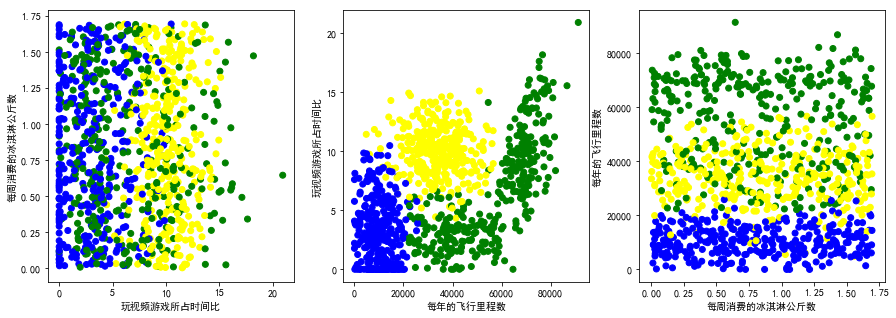

In [3]:
import matplotlib.pyplot as plt
def show_data(dataset, labels):
    color_label = []
    for i in labels:
        if i == 1:
            color_label.append('green')#dislike
        elif i == 2:
            color_label.append('blue')#smallDoses
        elif i == 3:
            color_label.append('yellow')#largeDoses
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(131)
    ax.set_xlabel('玩视频游戏所占时间比')
    ax.set_ylabel('每周消费的冰淇淋公斤数')
    ax.scatter(dataset.iloc[:,1], dataset.iloc[:,2], c=color_label)
    ax = fig.add_subplot(132)
    ax.set_xlabel('每年的飞行里程数')
    ax.set_ylabel('玩视频游戏所占时间比')
    ax.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c=color_label)
    ax = fig.add_subplot(133)
    ax.set_xlabel('每周消费的冰淇淋公斤数')
    ax.set_ylabel('每年的飞行里程数')
    ax.scatter(dataset.iloc[:,2], dataset.iloc[:,0], c=color_label)
    plt.show()
show_data(dataset, labels)

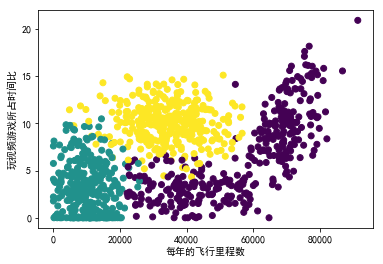

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('每年的飞行里程数')
ax.set_ylabel('玩视频游戏所占时间比')
ax.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c=15.0*labels)
plt.show()

In [5]:
def normfeature(x):
    x_min = x.min()
    x_max = x.max()
    x = (x-x_min) / (x_max-x_min)
    return x, x_min, x_max-x_min

In [6]:
dataset,x_min, ranges = normfeature(dataset)
#dataset.head()
dataset.tail()

,frequentFlyerMiles,VideoGamePlayed,IceCreamEaten
995,0.122106,0.163037,0.372224
996,0.754287,0.476818,0.394621
997,0.291159,0.509103,0.510795
998,0.527111,0.436655,0.429005
999,0.479408,0.376809,0.785718


In [17]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.1)

In [18]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
print(clf.get_params())

{'weights': 'uniform', 'metric_params': None, 'p': 2, 'n_neighbors': 3, 'metric': 'minkowski', 'n_jobs': None, 'leaf_size': 30, 'algorithm': 'auto'}


In [20]:
clf.score(x_test, y_test)

0.95

In [21]:
clf.predict(x_test[:10]) #预测

array([3, 1, 1, 3, 3, 1, 3, 2, 3, 2], dtype=int64)

In [53]:
print(y_test[:10])
print(x_test[:10])
clf.predict(x_test[:10]) #预测

995    2
641    2
78     3
492    1
239    2
200    2
691    1
624    3
132    2
845    2
Name: labels, dtype: int64
     frequentFlyerMiles  VideoGamePlayed  IceCreamEaten
995            0.122106         0.163037       0.372224
641            0.118852         0.077215       0.054207
78             0.508650         0.348586       0.323102
492            0.416333         0.081880       0.143292
239            0.128757         0.266740       0.092805
200            0.236751         0.272432       0.820803
691            0.656886         0.163149       0.610409
624            0.480635         0.274850       0.116692
132            0.000000         0.275206       0.626323
845            0.104270         0.183857       0.365219


array([2, 2, 3, 1, 2, 1, 1, 1, 2, 2], dtype=int64)

In [69]:
print(dataset.iloc[624,:])
print(labels.iloc[624])
print(x_test.iloc[7].values.reshape(1,-1))
print(clf.predict(x_test.iloc[7].values.reshape(1,-1))) #预测

frequentFlyerMiles    0.480635
VideoGamePlayed       0.274850
IceCreamEaten         0.116692
Name: 624, dtype: float64
3
[[0.48063502 0.27485004 0.11669237]]
[1]


In [70]:
my_neighbors = clf.kneighbors(x_test.iloc[7].values.reshape(1,-1))
print(my_neighbors)
for i in my_neighbors[1][0]:
    #print(labels[i])  错误示范 注意是测试集中样本索引
    print(y_train.iloc[i])

(array([[0.05327781, 0.06853968, 0.08442186]]), array([[301, 715, 812]], dtype=int64))
3
1
1


In [13]:
import numpy as np
def classifyperson():
    resultlist = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("玩视频游戏所消耗时间百分比："))
    ffMiles = float(input("每年获得的飞行常客里程数："))
    iceCream = float(input("每周消费的冰淇淋公升数："))
    # 生成NumPy数组，测试集
    inArr = np.array([ffMiles, percentTats, iceCream])
    # 测试集归一化
    norminArr = (inArr - x_min) / ranges
    print(norminArr)
    result = clf.predict(norminArr.values.reshape(1, -1))
    #print(result, type(result))
    print("你可能%s这个人" % (resultlist[result[0] - 1]))
classifyperson()

玩视频游戏所消耗时间百分比：12
每年获得的飞行常客里程数：44000
每周消费的冰淇淋公升数：0.5
frequentFlyerMiles    0.482070
VideoGamePlayed       0.573632
IceCreamEaten         0.294414
dtype: float64
你可能in large doses这个人


In [17]:
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
import numpy as np

In [18]:
def img2vector(filename):
    """
    convert img text file to vector
    return: 1*1024 vector
    """
    dataframe = pd.read_fwf(filename, widths=[1]*32, header=None)
    return dataframe.values.reshape(-1)
    #return np.ravel(dataframe)

In [19]:
testvector = img2vector('testDigits/0_0.txt')
print(testvector)

[0 0 0 ... 0 0 0]


In [20]:
import os
def handwriting():
    # preparing training dataset
    train_dir = os.listdir('trainingDigits')
    m = len(train_dir)
    #print(m)
    train_labels = []
    train_data = []
    for i in range(m):
        file_name = train_dir[i]
        #print(file_name)
        str_name = file_name.split('.')[0] # 0_0
        str_class = str_name.split('_')[0] # 0
        train_labels.append(int(str_class))
        train_data.append(img2vector('trainingDigits/%s' % file_name))
    #print(len(train_labels))
    #print(len(train_data))
    train_labels = pd.Series(train_labels)
    #print(train_labels)
    train_data = pd.DataFrame(train_data)
    #print(train_data)
    #print(type(train_data))
    print('training dataset has been prepared')
    
    test_dir = os.listdir('testDigits')
    m_test = len(test_dir)
    test_labels = []
    test_data = []
    for i in range(m_test):
        file_name = test_dir[i]
        #print(file_name)
        str_name = file_name.split('.')[0] # 0_0
        str_class = str_name.split('_')[0] # 0
        test_labels.append(int(str_class))
        test_data.append(img2vector('testDigits/%s' % file_name))
    #print(len(train_labels))
    #print(len(train_data))
    test_labels = pd.Series(test_labels)
    #print(train_labels)
    test_data = pd.DataFrame(test_data)
    #print(train_data)
    #print(type(train_data))
    print('test dataset has been prepared')
    return train_data, train_labels, test_data, test_labels

In [21]:
train_data, train_labels, test_data, test_labels = handwriting()

training dataset has been prepared
test dataset has been prepared


In [22]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
clf.score(test_data, test_labels)

0.9873150105708245

In [88]:
print(test_data.shape)

(946, 1024)


In [24]:
test_predict = clf.predict(test_data) #预测
print(test_predict)
print(sum(test_predict!=test_labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

In [90]:
clf.predict_proba(test_data.iloc[0].values.reshape(1,-1)) #预测
#print(clf.predict(test_data.iloc[0].values)) #预测

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])